<h1 align="center">RESULTS: Comparision of SuperStar and Lower Tax on Employees </h1> 



This file generates  aggregate and  cross-sectional moments using the simulated data. The simlations are generated using the simulate.py fle. Please update the paths to the simulation data before running.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import stats
import os.path
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_colwidth', -1)
from SCEconomy import *
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib as mpl
mpl.rc("savefig",dpi=200)
from matplotlib import pyplot as plt
# plt.rcParams["figure.figsize"] = (10.,10.)

In [2]:
from IPython.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
df_baseline=[]
df_target=[]
def gini(series, weights):
    if series.size!=weights.size:
        print("Weights are not the same size as the series")
        return
    sorted_series = series.sort_values()
    height, area = 0, 0
    for i in range(series.size):
        value = series[sorted_series.index[i]]
        wgt = weights[sorted_series.index[i]]
        height += wgt*value
        area += wgt*(height - value / 2)
    fair_area = height * weights.sum() / 2.
    return (fair_area - area) / fair_area


def gini_alt(series):
    csum= 0.0
    N=len(series)
    for i in range(N):
        for j in range(N):
            value_i = series.iloc[i]
            value_j = series.iloc[j]
            csum+=np.abs(value_i-value_j)
        
    gini_val=0.5*(csum/(N)**2)/series.mean()
    
    return gini_val


def Lorenz(series,quantiles):
    N=len(quantiles)
    Lz=np.zeros(N)
    for n in range(N):
        selection = series<series.quantile(quantiles[n])
        Lz[n]=series[selection].sum()/series.sum()
               
        
    return  Lz


def uploadData(case,w,rs,rc,p,delta):
    data=pd.DataFrame()
    is_iz=pd.read_csv(case+'/is_to_iz.csv',delim_whitespace=True,header=None)
    zgrid=pd.read_csv(case+'/zgrid.csv',delim_whitespace=True,header=None)
    is_to_ieps=pd.read_csv(case+'/is_to_ieps.csv', delim_whitespace=True,header=None)
    epsgrid=pd.read_csv(case+'/epsgrid.csv', delim_whitespace=True,header=None)
    T=100-1
    
    data['s_ind_']=pd.read_csv(case+'/data_i_s.csv', delim_whitespace=True,header=None).iloc[:,T-1]
    data['s_ind']=pd.read_csv(case+'/data_i_s.csv', delim_whitespace=True,header=None, usecols=[T])
    
    
    data['eps']=epsgrid.values.flatten()[is_to_ieps.astype('int').values.flatten()[data.s_ind.astype('int').values.flatten()]]   
    data['eps_']=epsgrid.values.flatten()[is_to_ieps.astype('int').values.flatten()[data.s_ind_.astype('int').values.flatten()]]   
    data['iz']=is_iz.astype('int').values.flatten()[data.s_ind.astype('int').values.flatten()]
    data['iz_']=is_iz.astype('int').values.flatten()[data.s_ind_.astype('int').values.flatten()]
    data['ieps']=is_to_ieps.astype('int').values.flatten()[data.s_ind.astype('int').values.flatten()]  
    data['ieps_']=is_to_ieps.astype('int').values.flatten()[data.s_ind_.astype('int').values.flatten()]
    data['z']=zgrid.values.flatten()[is_iz.astype('int').values.flatten()[data.s_ind.astype('int').values.flatten()]]    
    data['z_']=zgrid.values.flatten()[is_iz.astype('int').values.flatten()[data.s_ind_.astype('int').values.flatten()]]    
    data['ys']=pd.read_csv(case+'/data_ys.csv', delim_whitespace=True,header=None, usecols=[T])
    data['ys_']=pd.read_csv(case+'/data_ys.csv', delim_whitespace=True,header=None, usecols=[T-1])
    data['ks']=pd.read_csv(case+'/data_ks.csv', delim_whitespace=True,header=None, usecols=[T])
    data['ns']=pd.read_csv(case+'/data_ns.csv', delim_whitespace=True,header=None, usecols=[T])
    data['x']=pd.read_csv(case+'/data_x.csv',  delim_whitespace=True,header=None, usecols=[T])
    data['n']=pd.read_csv(case+'/data_n.csv', delim_whitespace=True,header=None, usecols=[T])
    data['ks_']=pd.read_csv(case+'/data_ks.csv', delim_whitespace=True,header=None, usecols=[T-1])
    data['ns_']=pd.read_csv(case+'/data_ns.csv', delim_whitespace=True,header=None, usecols=[T-1])
    data['x_']=pd.read_csv(case+'/data_x.csv',  delim_whitespace=True,header=None, usecols=[T-1])
    data['n_']=pd.read_csv(case+'/data_n.csv', delim_whitespace=True,header=None, usecols=[T-1])
    data['flagC']=pd.read_csv(case+'/data_is_c.csv', delim_whitespace=True,header=None, usecols=[T])
    data['flagC_']=pd.read_csv(case+'/data_is_c.csv', delim_whitespace=True,header=None, usecols=[T-1])
    data['flagO']=pd.read_csv(case+'/data_is_o.csv',delim_whitespace=True,header=None, usecols=[T])
    data['kappa']=pd.read_csv(case+'/data_kap.csv', delim_whitespace=True,header=None, usecols=[T])
    data['hkap']=pd.read_csv(case+'/data_hkap.csv',  delim_whitespace=True,header=None, usecols=[T])
    data['hy']=pd.read_csv(case+'/data_hy.csv',  delim_whitespace=True,header=None, usecols=[T])
    data['s_age']=pd.read_csv(case+'/s_age.csv',  delim_whitespace=True,header=None)
    data['sind_age']=pd.read_csv(case+'/sind_age.csv',  delim_whitespace=True,header=None)
    data['ind_age']=pd.read_csv(case+'/ind_age.csv',  delim_whitespace=True,header=None)
    data['c_age']=pd.read_csv(case+'/c_age.csv',  delim_whitespace=True,header=None)
    data['div_']=pd.read_csv(case+'/data_div_sweat.csv',  delim_whitespace=True,header=None, usecols=[T-1])
    data['div']= pd.read_csv(case+'/data_div_sweat.csv',  delim_whitespace=True,header=None, usecols=[T])
    data['val_sdf_']=pd.read_csv(case+'/data_val_sweat_dyna_sdf.csv',  delim_whitespace=True,header=None, usecols=[T-1])
    data['val_mf_']=pd.read_csv(case+'/data_val_sweat_dyna_fix.csv',  delim_whitespace=True,header=None, usecols=[T-1])

    data['val_sdf']=pd.read_csv(case+'/data_val_sweat_dyna_sdf.csv',  delim_whitespace=True,header=None, usecols=[T])
    data['val_mf']=pd.read_csv(case+'/data_val_sweat_dyna_fix.csv',  delim_whitespace=True,header=None, usecols=[T])
    data['a']= pd.read_csv(case+'/data_a.csv',  delim_whitespace=True,header=None, usecols=[T])
    
    data['flagC']=data['flagC'].astype('bool')
    data['flagC_']=data['flagC_'].astype('bool')
    data['flagO']=data['flagO'].astype('bool')
    data['expenses']=(rs+delta)*data['ks']+w*data['ns']+data['x']
    data['expenses_']=(rs+delta)*data['ks_']+w*data['ns_']+data['x_']
    data['wns']=data['ns']*w
    data['pys']=p*data['ys']

    data['bus_inc']=p*data['ys']-data['expenses']
    data['bus_inc_']=p*data['ys_']-data['expenses_']
    data['lab_inc']=data.eps*w*data.n
    data['lab_inc_']=data.eps_*w*data.n_
    data['n_e']=data['hkap']+data['hy']
    data['ne']=data['n_e']
    data['kappa_adj']=(data.kappa**0.15)*data.z
    data['ret_sdf']=(data['val_sdf']+data['div_'])/data['val_sdf_']+0.02
    data['ret_mf']=(data['val_mf']+data['div_'])/data['val_mf_']+0.02
    data['div_yld_sdf']=(data['div'])/data['val_sdf']
    data['div_yld_mf']=(data['div'])/data['val_mf']
    #data['intan_int_sdf']=data['val_sdf'] /(data['val_sdf']+data['ks'])
    #data['intan_int_mf']=data['val_mf'] /(data['val_mf']+data['ks'])
    data['profit_rate']=100*data['bus_inc']/data['ks']
    data['measured_markups']=100*(data['bus_inc'])/(data['x']+(rs+delta)*data['ks']+w*data['ns'])
    data['measured_markups_alt']=100*(data['bus_inc']+data['x'])/((rs+delta)*data['ks']+w*data['ns'])
    data['x_pys']=data['x']/(p*data['ys'])
    data['cogs']=((rs+delta)*data['ks']+w*data['ns']+data['x'])    
    data['wealth_sdf']=data['a']+data['val_sdf']   
    data['wealth_mf']=data['a']+data['val_mf']   
    data['ztilde'] = np.log(data['z'])
    data['zkapphi']=data['z']*data['kappa']**(0.15)
    data['ztilde_meas'] = np.log(data['ys']/(data['ks']**(0.333)*data['ns']**(0.666)))
    data['inc']=0.0
    data['inc'][data['flagC']==True]=data[data['flagC']==True]['lab_inc']
    data['inc'][data['flagC']==False]=data[data['flagC']==False]['bus_inc']
    data['tot_inc']=data['inc']+rc*data['a'] 
    if os.path.exists(case+'/data_R.csv'):
        data['R']= pd.read_csv(case+'/data_R.csv',  delim_whitespace=True,header=None, usecols=[T])
        data['intan_int']=data['R']/(data['R']+data['ks'])
        data['wealth_R']=0.0
        data['wealth_R'][data['flagC']==True]=data[data['flagC']==True]['a']   
        data['wealth_R'][data['flagC']==False]=data[data['flagC']==False]['a']+data[data['flagC']==False]['R']   
        data['wealth_income_ratio']=data['wealth_R']/data['tot_inc']
  
  

    data['wgt']=1.0
    return data




def get_prices(path_baseline,momfilename):
    with open (path_baseline+ momfilename, 'rt') as myfile:  # Open file lorem.txt for reading text
        for myline in myfile:                 # For each line, read it to a string 
          #print("gdp line")
          #print(myline.find("GDP("))
          if myline.find("w")==0:
            #print(myline)
            w=float(myline[ myline.find("=")+1:])
          if myline.find("S-good price")==0:
            #print(myline)
            p=float(myline[ myline.find("=")+1:])
          if myline.find("rc")==0:
            #print(myline)
            rc=float(myline[ myline.find("=")+1:])
          if myline.find("rs")==0:
            #print(myline)
            rs=float(myline[ myline.find("=")+1:])
          if myline.find("GDP(")==2:
            #print(myline)
            GVA=float(myline[ myline.find("=")+1:])
          if myline.find("investment,")==2:
            #print(myline)
            x=float(myline[ myline.find("=")+1:])
            #print("GDP = "+ str(GVA-x))
          if myline.find("delk ")==0:
            #print(myline)
            delta=float(myline[ myline.find("=")+1:])
            #print("delta= "+ str(delta))
            
    return w,p,rc,rs,delta,GVA-x



def decomposition (var_bin,bins,varlist):
    print('')
    print("SORTED BY " + var_bin)
    print("BINS = " + str([round(b,2) for b in bins ]) )
    

    data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
    mean_baseline=data.groupby('bin_' + var_bin).mean()[varlist]
    count_baseline=data.groupby('bin_' + var_bin).count()[varlist]
    
    
    print("-------------- baseline means ----------")
    print(mean_baseline)
    print("-------------- baseline counts ----------")
    print(count_baseline)
    print('')
    return mean_baseline,count_baseline

def format_table(data,total):
    results=[]
    results=pd.DataFrame(data) 
    results['bins/total']=(sorted(pd.cut(df_baseline[var_bin], bins).unique()) )
    cols = results.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    results=results[cols]  #    OR    df = df.ix[:, cols]
    results=results.append(total,ignore_index=True)
    results.iloc[-1,0]='total'
    
    return results


def print_results (var_bin,bins,varlist,df_baseline=df_baseline,df_target=df_target):
    print('')
    print("SORTED BY " + var_bin)
    print("BINS = " + str([round(b,2) for b in bins ]) )
    

    df_baseline['bin_' + var_bin] = pd.cut(df_baseline[var_bin], bins, labels = False) 
    df_target['bin_' + var_bin] = pd.cut(df_target[var_bin], bins, labels = False) 
    
    mean_baseline=df_baseline.groupby('bin_' + var_bin).mean()[varlist]
    mean_target=df_target.groupby('bin_' + var_bin).mean()[varlist]
    sum_baseline=df_baseline.groupby('bin_' + var_bin).sum()[varlist]
    sum_target=df_target.groupby('bin_' + var_bin).sum()[varlist]
    count_baseline=df_baseline.groupby('bin_' + var_bin).count()[varlist]
    count_target=df_target.groupby('bin_' + var_bin).count()[varlist]
    
    intensive=(mean_target-mean_baseline)*(count_target+count_baseline)/2
    extensive=(count_target-count_baseline)*(mean_target+mean_baseline)/2
    total=intensive+extensive
    intensive=100.*(intensive/(total.sum()))
    extensive=100.*(extensive/(total.sum()))
    total_per_change=(100*total.sum()/sum_baseline.sum()).T
    intensive_alt=intensive*total_per_change*(1.0/100)
    extensive_alt=extensive*total_per_change*(1.0/100)
   
    return total,sum_baseline,intensive_alt,extensive_alt

   

    print('')
    
def __extract_num__(item_name, text):
    
    import re
    for ln in text.splitlines():
        if ln.startswith(item_name):

            match = re.search(r'[-+]?[0-9]*\.?[0-9]+([eE][-+]?[0-9]+)?', ln[len(item_name):])

            if match is not None:
                return float(match.group(0))
            else:
                return np.nan
                    
                
    return np.nan

def get_data_textbuffer(item_name, outputs):
    
    return np.array([__extract_num__(item_name, text) for text in outputs])
    
   

## Set paths

In [4]:
casename='newbench_superstar'
targetname='newbench_superstar_taunonly'
#path_baseline = '/home/shared/yaoxx366/save_data/save_data_'+casename+'/'
path_baseline='./save_data_'+casename
path_table = './save_data_'+casename+'/'
path_target = './save_data_'+ targetname + '/'
momfilename_baseline= 'paras_mom_' + casename  + '.txt'
momfilename_target= 'paras_mom_' + targetname  + '.txt'
pathtosiminitbase='./save_data_'+ casename+  '/econ_' +casename + '.pickle'
pathtosiminittarget='./save_data_'+ targetname+  '/econ_' +targetname + '.pickle'
my_file_handle=open(path_baseline+ '/' + momfilename_baseline )
textbuffer_baseline=my_file_handle.read()

# Calibration

## Preferences

In [5]:
print(pd.read_csv(path_table + 'preferences.csv').to_string(header=None))

Discount factor                           0.980
Paternalistic discount factor             1.000
Consumption weight                        0.420
Leisure weight                            0.580
Intertemporal elasticity inverse          1.500
C-corporate good share in consumption     0.448
Love of business parameter                0.000
Labor productivity decline for the old    0.500
Business productivity decline for the old 0.500


## Life cycle related params

In [6]:
print(pd.read_csv(path_table + 'age_transition_table.csv', skiprows = 1).to_string(index=None))

Unnamed: 0     y     o
 y         0.978 0.022
 o         0.067 0.933


## Technology

In [7]:
print(pd.read_csv(path_table + 'technologies.csv').to_string(header=None))

Technology growth                                                      0.020
C-corporate fixed asset share                                          0.522
Private business fixed asset share                                     0.300
Private business sweat capital share                                   0.150
Private business ces labor composite share                             0.550
Private business employee hours share parameter in ces labor composite 0.522
Private business hours substitution parameter in ces labor composite   0.500
Fixed asset depreciation                                               0.041
Sweat capital depreciation                                             0.058
Sweat capital owner hour share                                         0.408
Sweat capital c-good share                                             0.592
Sweat capital deterioration for workers                                0.200
Sweat capital deterioration for bequests                               0.100

## Shocks

### Business skill

In [8]:
# np.loadtxt(path_table + 'business_productivity_transition_table.csv', skiprows = 2, skipcolumn = 1)
# pd.read_csv(path_table + 'business_productivity_transition_table.csv', skiprows = 1)


print(pd.Series(pd.read_csv(path_table + 'business_productivity_transition_table.csv', skiprows = 1).iloc[:,0]).to_frame('zgrid').T)
print()
print(pd.DataFrame(pd.read_csv(path_table + 'business_productivity_transition_table.csv', skiprows = 1).iloc[:,1:].values))


       0  1  2  3  4  5
zgrid  0  1  2  3  4  5

      0     1     2     3     4     5
0 0.612 0.170 0.098 0.065 0.055 0.000
1 0.172 0.551 0.187 0.064 0.025 0.000
2 0.099 0.191 0.475 0.190 0.045 0.000
3 0.060 0.055 0.164 0.558 0.164 0.000
4 0.045 0.009 0.034 0.135 0.775 0.001
5 0.000 0.000 0.000 0.000 0.022 0.978


### Labor skills

In [9]:
print(pd.Series(pd.read_csv(path_table + 'labor_productivity_transition_table.csv', skiprows = 1).iloc[:,0]).to_frame('epsgrid').T)
print('')
print(pd.DataFrame(pd.read_csv(path_table + 'labor_productivity_transition_table.csv', skiprows = 1).iloc[:,1:].values))


         0  1  2  3  4
epsgrid  0  1  2  3  4

      0     1     2     3     4
0 0.424 0.549 0.027 0.000 0.000
1 0.046 0.621 0.327 0.005 0.000
2 0.001 0.145 0.709 0.145 0.001
3 0.000 0.005 0.327 0.621 0.046
4 0.000 0.000 0.027 0.549 0.424


## Tax policy

### Pass thru income tax

In [10]:
print(pd.read_csv(path_table + 'business_income_tax.csv').to_string(index=None))

 bbracket_left  bbracket_right   taub   psib
-inf             0.153         0.140  0.010 
0.153            0.304         0.183  0.037 
0.304            0.912         0.201  0.060 
0.912            2.667         0.235  0.188 
2.667            5.727         0.262  0.484 
5.727            9.104         0.269  0.650 
9.104            inf           0.280  1.062 


### Labor income tax

In [11]:
print(pd.read_csv(path_table + 'labor_income_tax.csv').to_string(index=None))

 nbracket_left  nbracket_right   taun   psin
-inf             0.173         0.293  -0.091
0.173            0.262         0.324  -0.069
0.262            0.404         0.343  -0.048
0.404            0.732         0.390  0.030 
0.732            1.409         0.400  0.060 
1.409            3.3138        0.408  0.106 
3.314            inf           0.419  0.257 


### Other taxes

In [12]:
print(pd.read_csv(path_table + 'policies.csv').to_string(header=None))

Consumption tax                        0.065
Dividends tax                          0.133
Profits tax                            0.360
Government expenditure relative to GDP 0.133
Retirement Transfer                    0.800


# Aggregates

In [13]:
mom=pd.read_csv(path_table + 'moments.csv')
mom.columns=['desc','val']    
tax=pd.read_csv(path_table + 'policies.csv')
tax.columns=['val']
cal=pd.read_csv(path_table + 'technologies.csv')
cal.columns=['val']
w=float(mom[mom.desc.str.strip()=='Wage (w)']['val'].values)
p=float(mom[mom.desc.str.strip()=='S-good price (p)']['val'].values)
rc=float(mom[mom.desc.str.strip()=='Interest rate (rc)']['val'].values)
GDP=float(mom[mom.desc.str.strip()=='GDP(yc + yn + p*Eys - Ex)']['val'].values)
taup=float(tax[tax.index.str.strip()=='Profits tax']['val'].values)
rs=rc*(1-taup)
delta=float(cal[cal.index.str.strip()=='Fixed asset depreciation']['val'].values)

In [14]:
data=uploadData(path_baseline,w,rs,rc,p,delta)

## GDP
We normalize several things in the paper by GDP

In [15]:
print(GDP)

4.157832003091141


## Aggregate markups
Agg markups  is defined as  sum of business incomes in passthrus / sum rental and wage expenses in pass thrus 

In [16]:
print(100*data.bus_inc.sum()/data.cogs.sum())

40.85246698091567


## Aggregate profitability
Agg profitability is defined as  sum of business incomes in passthrus / sum of physical capital used in pass thrus 

In [17]:
print(100*data.bus_inc.sum()/data.ks.sum())

8.01754654489454


## National Accounts

### income share

In [18]:
print(pd.read_csv(path_table + 'income_shares.csv').to_string(header=None,index=None))

 Business Income                              0.736
 Sweat labor income                           0.089
 Non-sweat labor income                       0.320
 Non-sweat labor income C corporations        0.216
 Non-sweat labor income pass through business 0.105
 Non-sweat capital income                     0.328
 Non-sweat capital income rents               0.191
 Non-sweat capital income depreciation        0.136
 Non-business Income                          0.264


### product share

In [19]:
print(pd.read_csv(path_table + 'product_shares.csv').to_string(header=None,index=None))

 Private Consumption                        0.557
 Government Consumption                     0.132
 Business Investments C corporations        0.135
 Business Investments pass through business 0.068
 Non-business Investments                   0.109


## Sweat equity by GDP

In [20]:
print(pd.read_csv(path_table + 'sweat_equity_div_gdp.csv').to_string(header=None))

0  discounted by beta_tilde 1.099
1  discounted by owner SDF  0.672


# Age profiles

## distribution by age

In [21]:
df = pd.read_csv(path_table + 'started_n_periods_ago.csv')
print((100*df[df['N periods ago'] <= 40].set_index('N periods ago').iloc[:,0]).to_string(header=None))

0    11.797
1    9.753 
2    8.302 
3    7.127 
4    6.346 
5    5.481 
6    4.886 
7    4.334 
8    3.856 
9    3.066 
10   2.999 
11   2.516 
12   2.252 
13   2.105 
14   1.855 
15   1.702 
16   1.534 
17   1.361 
18   1.219 
19   1.110 
20   0.926 
21   0.907 
22   0.769 
23   0.694 
24   0.678 
25   0.598 
26   0.558 
27   0.488 
28   0.512 
29   0.342 
30   0.331 
31   0.406 
32   0.323 
33   0.270 
34   0.259 
35   0.254 
36   0.264 
37   0.203 
38   0.211 
39   0.195 
40   0.171 


## sweat capital by age

              sind_age  kappa
bin_sind_age                 
0.000        0.000     0.353 
1.000        1.000     0.448 
2.000        2.000     0.485 
3.000        3.000     0.501 
4.000        4.000     0.520 
5.000        5.918     0.583 
6.000        8.891     0.579 
7.000        11.449    0.636 
8.000        13.930    0.714 
9.000        19.662    0.793 
10.000       27.810    1.026 
11.000       32.783    1.071 
12.000       37.784    1.086 
13.000       42.846    1.216 
14.000       48.016    1.280 
15.000       52.753    1.239 
16.000       57.890    0.955 
17.000       69.696    1.049 
18.000       112.595   0.512 


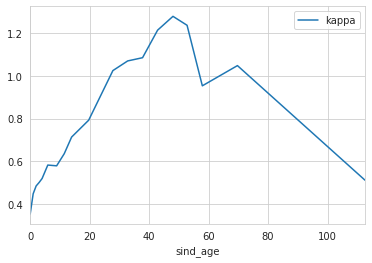

In [22]:
sel=(~data['flagC'] )
var_bin = 'sind_age'
varlist=['kappa','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','bus_inc','hy','hkap','n_e','ns','ks','R','x']
bins=[-1,0,1,2,3,4,7,10, 12,15,25,30,35,40,45,50,55,60,80,500 ]
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
mean_baseline[['sind_age','kappa']].plot(x='sind_age',y='kappa')
mean_baseline[['sind_age','kappa']].to_csv('sind_kappa.csv')
print(mean_baseline[['sind_age','kappa']])

## Regression of $\log V_{\kappa}$ on $age,age^2$: Pratts

In [23]:
prattsdata=pd.read_csv('prattsdatabase.csv',encoding='latin-1')    
prattsdata['TargetAge2']=prattsdata['TargetAge']**2

prattsdata['TargetStructureAlt']=prattsdata['TargetStructure'].values
sel=prattsdata['TargetStructure'].isin(['Partnership', 'Limited Partnership', 'LLP'])
prattsdata.loc[sel,'TargetStructureAlt']='Partnership'
sel=prattsdata['TargetStructure'].isin(['Consolidated', 'UK Corporation', 'PC','Non-Profit','Ltd','Limited Corporation'])
prattsdata.loc[sel,'TargetStructureAlt']='Others'
sel=prattsdata['TargetStructure'].isin(['C corporation'])
prattsdata.loc[sel,'TargetStructureAlt']='C Corporation'

naics_labels=['Agriculture, Forestry, Fishing and Hunting',\
        'Mining, Quarrying, and Oil and Gas Extraction',\
        'Utilities',\
        'Construction',\
        'NA1',\
        'Manufacturing',\
        'NA2',\
        'Wholesale Trade',\
        'Retail Trade',\
        'NA3',\
        'Transportation and Warehousing',\
        'NA4',\
        'Information',\
        'Finance and Insurance',\
        'Real Estate and Rental and Leasing',\
        'Professional, Scientific, and Technical Services',\
        'Management of Companies and Enterprises',\
        'Administrative and Support and Waste Management and Remediation Services'\
        'NA5',\
        'Educational Services',\
        'Health Care and Social Assistance',\
        'Arts, Entertainment, and Recreation',\
        'Accommodation and Food Service',\
        'Other Services','Public administration']

len(naics_labels)

naics_code=[11,21,22,23,24,31,35,42,44,46,48,50,51,52,53,54,55,56,61,62,71,72,81,83,92]
n=24


#naics_labels=['Ag. Mining and Utilities',\
#        'Consts and Mfg',\
#        'Trade and warehousing',\
#        'Information and FIRE',\
#        'RE',\
#        'Professional services',\
#        'Nonprof services']

#naics_code=[11,23,42,51,53,54,57,92]

prattsdata['naics_label']=pd.cut(prattsdata['TargetNAICS1']/10**10,naics_code[:n+1],labels=naics_labels[:n],include_lowest=True,right=False)
prattsdata['naics_code_cat']=pd.cut(prattsdata['TargetNAICS1']/10**10,naics_code[:n+1],include_lowest=True,right=False)
prattsdata['naics_2d']=pd.cut(prattsdata['TargetNAICS1']/10**10,naics_code[:n+1],labels=naics_code[:n],include_lowest=True,right=False)

prattsdata['year'] = prattsdata['SaleDate'].str[-4:]
prattsdata['year']=prattsdata['year'].astype(int)



import statsmodels.api as sm

dummies1 = pd.get_dummies(prattsdata['naics_code_cat']).rename(columns=lambda x: 'nacis_code_cat' + str(x))
dummies2 = pd.get_dummies(prattsdata['year']).rename(columns=lambda x: 'year' + str(x))
X = pd.concat([prattsdata[['TargetAge','TargetAge2']],dummies1,dummies2],axis=1)
Y=np.log(prattsdata.TotalIntangiblesPPA)
X = sm.add_constant(X)
selection=(pd.notnull(prattsdata.TargetAge)) & (prattsdata.TotalIntangiblesPPA>0)& ~(prattsdata.TargetStructureAlt=='C Corporation')& ~(prattsdata.TargetStructureAlt=='LLC')
model11 = sm.OLS(Y[selection], X[selection]).fit()
model11.summary()

24

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     TotalIntangiblesPPA   R-squared:                       0.228
Model:                             OLS   Adj. R-squared:                  0.223
Method:                  Least Squares   F-statistic:                     45.30
Date:                 Mon, 15 Jun 2020   Prob (F-statistic):               0.00
Time:                         18:28:06   Log-Likelihood:                -13411.
No. Observations:                 6943   AIC:                         2.691e+04
Df Residuals:                     6897   BIC:                         2.723e+04
Df Model:                           45                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     11.5470      1.145     10.084      0.000       9.302      13.792
TargetAge                  0.0183      0.002      8.629      0.000       0.014       0.022
TargetAge2              -4.99e-05   1.46e-05     -3.413      0.001   -7.86e-05   -2.12e-05
nacis_code_cat[11, 21)    -0.4594      1.285     -0.357      0.721      -2.979       2.060
nacis_code_cat[21, 22)     3.1797      1.294      2.458      0.014       0.644       5.716
nacis_code_cat[22, 23)    -0.5650      1.349     -0.419      0.675      -3.209       2.079
nacis_code_cat[23, 24)    -0.1541      1.194     -0.129      0.897      -2.494       2.186
nacis_code_cat[24, 31) -6.894e-15   1.01e-14     -0.686      0.493   -2.66e-14    1.28e-14
nacis_code_cat[31, 35)     0.2924      1.192      0.245      0.806      -2.044       2.629
nacis_code_cat[35, 42) -1.458e-14    3.9e-14     -0.373      0.709   -9.11e-14    6.19e-14
nacis_code_cat[42, 44)    -1.7597      1.286     -1.369      0.171      -4.280       0.761
nacis_code_cat[44, 46)    -1.0531      1.191     -0.884      0.377      -3.388       1.281
nacis_code_cat[46, 48) -1.401e-14   1.87e-14     -0.751      0.453   -5.06e-14    2.26e-14
nacis_code_cat[48, 50)    -0.6359      1.194     -0.533      0.594      -2.977       1.705
nacis_code_cat[50, 51)  4.997e-15   7.13e-15      0.701      0.484   -8.98e-15     1.9e-14
nacis_code_cat[51, 52)     1.9595      1.198      1.636      0.102      -0.388       4.307
nacis_code_cat[52, 53)     0.4310      1.199      0.360      0.719      -1.919       2.781
nacis_code_cat[53, 54)    -0.5248      1.196     -0.439      0.661      -2.870       1.820
nacis_code_cat[54, 55)     0.3950      1.193      0.331      0.741      -1.944       2.734
nacis_code_cat[55, 56)     5.4398      1.407      3.866      0.000       2.681       8.198
nacis_code_cat[56, 61)    -0.8055      1.192     -0.676      0.499      -3.141       1.530
nacis_code_cat[61, 62)    -1.0929      1.205     -0.907      0.364      -3.455       1.269
nacis_code_cat[62, 71)    -0.5618      1.194     -0.471      0.638      -2.902       1.778
nacis_code_cat[71, 72)    -1.2780      1.201     -1.064      0.287      -3.632       1.076
nacis_code_cat[72, 81)    -1.5446      1.191     -1.297      0.195      -3.879       0.790
nacis_code_cat[81, 83)    -1.6104      1.191     -1.352      0.176      -3.946       0.725
nacis_code_cat[83, 92)  3.713e-15   1.25e-14      0.298      0.766   -2.07e-14    2.82e-14
year1990               -1.387e-14   2.27e-14     -0.612      0.540   -5.83e-14    3.05e-14
year1991               -9.191e-15   8.71e-15     -1.055      0.291   -2.63e-14    7.88e-15
year1992               -1.186e-14   8.03e-15     -1.477      0.140   -2.76e-14    3.88e-15
year1993                  -1.1647      1.142     -1.020      0.308   

## Regression of $\log V_{\kappa}$ on $age,age^2$: Model

In [24]:
sel=(~data['flagC'] )
data['sind_age2']=data['sind_age']**2
X = data[['sind_age','sind_age2']]
Y=np.log(data.R)
X = sm.add_constant(X)
model11 = sm.OLS(Y[sel], X[sel]).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                nan
Time:                        18:28:06   Log-Likelihood:                    nan
No. Observations:               37475   AIC:                               nan
Df Residuals:                   37472   BIC:                               nan
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
sind_age          nan        nan        nan        nan         nan         nan
sind_age2        -inf        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                     2.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Business and Labor Income Percentiles

In [25]:
quantiles=pd.DataFrame( (data[data.flagC==True].lab_inc.quantile(np.linspace(0,1,21))))
quantiles['bus_inc']=data[data.flagC==False].bus_inc.quantile(np.linspace(0,1,21))
print(quantiles)

       lab_inc  bus_inc
0.000 0.000    -15.160 
0.050 0.000    -1.284  
0.100 0.000    -0.006  
0.150 0.503    -0.002  
0.200 0.876    -0.000  
0.250 1.281    -0.000  
0.300 1.584    -0.000  
0.350 1.755    -0.000  
0.400 1.899    0.000   
0.450 2.015    0.000   
0.500 2.103    0.003   
0.550 2.171    0.044   
0.600 2.234    0.186   
0.650 2.299    0.552   
0.700 2.388    1.181   
0.750 2.661    2.446   
0.800 3.827    2.727   
0.850 4.057    2.883   
0.900 4.240    3.019   
0.950 4.435    3.153   
1.000 7.848    22.198  


# Lorenz curves

In [26]:
sel=(~data['flagC'] )
LzData=pd.DataFrame()
LzData['frac_pop']=np.linspace(0,1,21)
LzData['bus_inc']=Lorenz(data[sel]['bus_inc'],LzData.frac_pop)
LzData['kappa']=Lorenz(data[sel]['kappa'],LzData.frac_pop)
LzData['hkap']=Lorenz(data[sel]['hkap'],LzData.frac_pop)
LzData['hy']=Lorenz(data[sel]['hy'],LzData.frac_pop)

LzData['ns']=Lorenz(data[sel]['ns'],LzData.frac_pop)
LzData['ks']=Lorenz(data[sel]['ks'],LzData.frac_pop)
LzData['R']=Lorenz(data[sel]['R'],LzData.frac_pop)
LzData['Vb_sdf']=Lorenz(data[sel]['val_sdf'],LzData.frac_pop)
LzData['Vb_mf']=Lorenz(data[sel]['val_mf'],LzData.frac_pop)

LzData

,frac_pop,bus_inc,kappa,hkap,hy,ns,ks,R,Vb_sdf,Vb_mf
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.050,-0.092,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.006
2,0.100,-0.108,0.000,0.000,0.000,0.000,0.000,0.000,0.015,0.024
3,0.150,-0.108,0.000,0.000,0.000,0.000,0.000,0.002,0.027,0.047
4,0.200,-0.108,0.000,0.000,0.000,0.000,0.000,0.003,0.040,0.070
5,0.250,-0.108,0.000,0.000,0.000,0.000,0.000,0.005,0.055,0.093
6,0.300,-0.108,0.001,0.000,0.000,0.000,0.000,0.007,0.071,0.117
7,0.350,-0.108,0.005,0.000,0.000,0.000,0.000,0.010,0.088,0.141
8,0.400,-0.108,0.020,0.001,0.000,0.000,0.000,0.012,0.106,0.166
9,0.450,-0.108,0.051,0.002,0.000,0.000,0.000,0.015,0.126,0.192


# Cross Sectional Moments: All Businesses

In [27]:
sel=(~data['flagC'] )

val,cols=stats.describe(data[sel].ret_sdf,data[sel]['wgt'])
moments_only_business=pd.DataFrame(val.T,columns=['gross_returns: sdf'])
moments_only_business.index=cols



val,cols=stats.describe(data[sel].ret_sdf,data[sel]['wgt'])
moments_only_business['gross_returns: sdf']=val


val,cols=stats.describe(data[sel].ret_mf,data[sel]['wgt'])
moments_only_business['gross_returns: mf']=val

sel2=sel&(data['ns']>0)
val,cols=stats.describe(data[sel2].intan_int,data[sel2]['wgt'])
moments_only_business['intan. intensity']=val


val,cols=stats.describe(data[sel].div_yld_sdf,data[sel]['wgt'])
moments_only_business['div yield: sdf']=val


val,cols=stats.describe(data[sel].div_yld_mf,data[sel]['wgt'])
moments_only_business['div yield: mf']=val


val,cols=stats.describe(data[sel2].R,data[sel2]['wgt'])
moments_only_business['market value: R']=val


val,cols=stats.describe(data[sel].val_sdf,data[sel]['wgt'])
moments_only_business['valuation: sdf']=val

val,cols=stats.describe(data[sel].val_mf,data[sel]['wgt'])
moments_only_business['valuation: mf']=val


val,cols=stats.describe(data[sel].kappa,data[sel]['wgt'])
moments_only_business['kappa']=val


val,cols=stats.describe(data[sel].bus_inc,data[sel]['wgt'])
moments_only_business['bus inc']=val



val,cols=stats.describe(data[sel].a,data[sel]['wgt'])
moments_only_business['fin wealth:a']=val


val,cols=stats.describe(data[sel].wealth_sdf,data[sel]['wgt'])
moments_only_business['wealth:vb_sdf+a']=val

val,cols=stats.describe(data[sel].wealth_mf,data[sel]['wgt'])
moments_only_business['wealth:vb_mf+a']=val



val,cols=stats.describe(data[sel].measured_markups,data[sel]['wgt'])
moments_only_business['markups']=val


sel_temp=(~data['flagC'] )  & (~pd.isna(data['ztilde_meas']))
val,cols=stats.describe(data[sel_temp].ztilde_meas,data[sel_temp]['wgt'])
moments_only_business['log_meas_tfp']=val

val,cols=stats.describe(data[sel].ztilde,data[sel]['wgt'])
moments_only_business['log_z']=val

val,cols=stats.describe(data[sel].hy,data[sel]['wgt'])
moments_only_business['hy']=val


val,cols=stats.describe(data[sel].hkap,data[sel]['wgt'])
moments_only_business['hkap']=val


val,cols=stats.describe(data[sel].hy,data[sel]['wgt'])
moments_only_business['hy']=val


val,cols=stats.describe(data[sel].n_e,data[sel]['wgt'])
moments_only_business['total owner hrs: hy+hkap']=val



print (moments_only_business)
moments_only_business.to_excel('moments_all_businesses.xls')


      gross_returns: sdf  gross_returns: mf  intan. intensity  div yield: sdf  \
mean 1.132               1.106              0.531             0.026             
std  1.222               0.961              0.416             0.128             
gini 0.148               0.107              0.416             2.213             
p10  0.882               0.973              0.106             -0.004            
p25  1.001               1.016              0.119             -0.000            
p50  1.022               1.024              0.321             0.000             
p75  1.178               1.141              1.000             0.115             
p95  1.750               1.510              1.000             0.172             
p99  2.633               1.910              1.000             0.190             

      div yield: mf  market value: R  valuation: sdf  valuation: mf  kappa  \
mean 0.023          2.193            4.653           6.836          0.587    
std  0.086          7.377        

## Decomposition by  Sweat Capital: All Businesses

In [28]:
sel=(~data['flagC'] )

var_bin = 'kappa'
num_bins=5
varlist=['kappa','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','bus_inc','hy','hkap','n_e','ks']
tmp, bins_original = pd.qcut(data[sel][var_bin], q = num_bins, labels=False, retbins = True)
data['bin_' + var_bin] = tmp[:]
bins = bins_original.copy()
bins[0] = -np.inf
bins[-1] = np.inf
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
print(mean_baseline)


           kappa  intan_int  ret_sdf  div_yld_sdf  measured_markups  val_sdf  \
bin_kappa                                                                      
0         0.000  0.998      0.998    0.000        -31.595           1.273      
1         0.060  0.839      1.002    -0.003       -30.469           1.415      
2         0.493  0.443      1.078    0.007        31.282            2.702      
3         0.684  0.216      1.139    0.088        58.915            4.733      
4         1.701  0.287      1.442    0.035        22.722            13.140     

               a  wealth_sdf  s_age  sind_age  ind_age  ztilde_meas  ztilde  \
bin_kappa                                                                     
0         52.389 53.663      23.321 11.824    55.841   1.041        -0.020    
1         38.722 40.136      15.879 11.909    57.757   1.053        0.028     
2         16.681 19.382      11.079 9.876     54.191   1.025        0.337     
3         10.444 15.177      7.006  6.327   

## Decomposition by  Financial assets: All Businesses

In [29]:
sel=(~data['flagC'] )

var_bin = 'a'
num_bins=5
varlist=['kappa','R','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','bus_inc','hy','hkap','n_e','ns','ks']
tmp, bins_original = pd.qcut(data[sel][var_bin], q = num_bins, labels=False, retbins = True)
data['bin_' + var_bin] = tmp[:]
bins = bins_original.copy()
bins[0] = -np.inf
bins[-1] = np.inf
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
print(mean_baseline)


       kappa     R  intan_int  ret_sdf  div_yld_sdf  measured_markups  \
bin_a                                                                   
0     0.366  0.938 0.671      1.138    -0.013       -2.791              
1     0.441  1.207 0.548      1.157    0.036        12.840              
2     0.498  1.429 0.484      1.124    0.037        21.967              
3     0.522  1.653 0.453      1.094    0.044        25.041              
4     1.110  5.139 0.631      1.146    0.025        -5.491              

       val_sdf       a  wealth_sdf  s_age  sind_age  ind_age  ztilde_meas  \
bin_a                                                                       
0     2.731    1.029   3.760       7.107  6.631     48.473   1.105          
1     3.240    4.316   7.556       6.763  6.207     47.713   1.026          
2     3.735    7.891   11.627      7.061  6.449     51.579   0.983          
3     4.225    13.030  17.256      8.274  7.680     58.724   0.956          
4     9.331    129.378 138

## Decomposition by z: All Businesses

In [30]:
sel=(~data['flagC'] )  
var_bin = 'z'
varlist=['kappa','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','bus_inc','hy','hkap','n_e','ns','ks','R']
bins=data[sel].z
bins=np.hstack((-1,sorted(data.z.unique())))
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
print(mean_baseline)

       kappa  intan_int  ret_sdf  div_yld_sdf  measured_markups  val_sdf  \
bin_z                                                                      
0     0.205  0.997      0.945    -0.001       -96.309           1.514      
1     0.149  0.983      0.974    -0.001       -77.392           1.446      
2     0.218  0.847      0.948    0.000        -18.606           1.585      
3     0.373  0.520      0.955    0.027        54.671            2.191      
4     0.600  0.317      1.279    0.042        43.451            4.398      
5     6.476  0.209      1.999    0.051        27.014            62.335     

            a  wealth_sdf  s_age  sind_age  ind_age  ztilde_meas  ztilde  \
bin_z                                                                      
0     38.921  40.435      17.042 11.445    56.212   1.051        -0.840    
1     38.016  39.462      17.045 11.098    56.362   1.056        -0.420    
2     35.048  36.633      16.361 11.172    55.904   1.060        0.000     
3     28.20

# Cross Sectional Moments: Young Businesses

#### ``young'' defined as owners that have been running the businesse for less than 5 yrs (variable: sind_age)

In [31]:
sel=(~data['flagC'] ) & (data['sind_age']<5.0)  

val,cols=stats.describe(data[sel].ret_sdf,data[sel]['wgt'])
moments_only_business=pd.DataFrame(val.T,columns=['gross_returns: sdf'])
moments_only_business.index=cols

val,cols=stats.describe(data[sel].ret_mf,data[sel]['wgt'])
moments_only_business['gross_returns: mf']=val


val,cols=stats.describe(data[sel].ret_sdf,data[sel]['wgt'])
moments_only_business['gross_returns: sdf']=val


sel2=sel&(data['ns']>0)
val,cols=stats.describe(data[sel2].intan_int,data[sel2]['wgt'])
moments_only_business['intan. intensity']=val


val,cols=stats.describe(data[sel].R,data[sel]['wgt'])
moments_only_business['market value: R']=val


val,cols=stats.describe(data[sel].div_yld_sdf,data[sel]['wgt'])
moments_only_business['div yield: sdf']=val


val,cols=stats.describe(data[sel].div_yld_mf,data[sel]['wgt'])
moments_only_business['div yield: mf']=val


val,cols=stats.describe(data[sel].val_sdf,data[sel]['wgt'])
moments_only_business['valuation: sdf']=val

val,cols=stats.describe(data[sel].val_mf,data[sel]['wgt'])
moments_only_business['valuation: mf']=val


val,cols=stats.describe(w*data[sel].ns,data[sel]['wgt'])
moments_only_business['ns']=val


val,cols=stats.describe(data[sel].ks,data[sel]['wgt'])
moments_only_business['ks']=val


val,cols=stats.describe(data[sel].bus_inc,data[sel]['wgt'])
moments_only_business['bus inc']=val



val,cols=stats.describe(data[sel].a,data[sel]['wgt'])
moments_only_business['fin wealth:a']=val


val,cols=stats.describe(data[sel].wealth_sdf,data[sel]['wgt'])
moments_only_business['wealth:vb_sdf+a']=val

val,cols=stats.describe(data[sel].wealth_mf,data[sel]['wgt'])
moments_only_business['wealth:vb_mf+a']=val



val,cols=stats.describe(data[sel].measured_markups,data[sel]['wgt'])
moments_only_business['markups']=val


sel_temp=(~data['flagC'] ) & (~data['flagO']) & (~pd.isna(data['ztilde_meas']))
val,cols=stats.describe(data[sel_temp].ztilde_meas,data[sel_temp]['wgt'])
moments_only_business['log_meas_tfp']=val


val,cols=stats.describe(data[sel].ztilde,data[sel]['wgt'])
moments_only_business['log_z']=val

val,cols=stats.describe(data[sel].hy,data[sel]['wgt'])
moments_only_business['hy']=val


val,cols=stats.describe(data[sel].hkap,data[sel]['wgt'])
moments_only_business['hkap']=val


val,cols=stats.describe(data[sel].hy,data[sel]['wgt'])
moments_only_business['hy']=val


val,cols=stats.describe(data[sel].n_e,data[sel]['wgt'])
moments_only_business['total owner hrs: hy+hkap']=val


print (moments_only_business)
moments_only_business.to_excel('moments_young_businesses.xls')


      gross_returns: sdf  gross_returns: mf  intan. intensity  \
mean 1.225               1.176              0.517               
std  1.783               1.383              0.423               
gini 0.203               0.146              0.430               
p10  0.846               0.974              0.101               
p25  0.990               1.016              0.112               
p50  1.055               1.065              0.232               
p75  1.251               1.175              1.000               
p95  2.023               1.653              1.000               
p99  2.934               2.030              1.000               

      market value: R  div yield: sdf  div yield: mf  valuation: sdf  \
mean 1.313            0.001           0.009          3.627             
std  2.712            0.171           0.113          5.136             
gini 0.686            84.404          6.364          0.400             
p10  0.008            -0.298          -0.150         1.209   

## Decomposition by  Sweat Capital: Young Businesses

In [32]:
sel=(~data['flagC'] ) & (data['sind_age']<5) 
var_bin = 'kappa'
num_bins=5
varlist=['kappa','x','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','bus_inc','hy','hkap','n_e','ns','ks']
tmp, bins_original = pd.qcut(data[sel][var_bin], q = num_bins, labels=False, retbins = True)
data['bin_' + var_bin] = tmp[:]
bins = bins_original.copy()
bins[0] = -np.inf
bins[-1] = np.inf
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
print(mean_baseline)


           kappa     x  intan_int  ret_sdf  div_yld_sdf  measured_markups  \
bin_kappa                                                                   
0         0.000  0.000 0.997      0.980    0.000        -29.216             
1         0.033  0.012 0.873      0.985    -0.006       -27.445             
2         0.563  0.316 0.357      1.169    -0.028       30.034              
3         0.713  0.338 0.197      1.318    0.062        43.089              
4         0.928  0.979 0.389      1.672    -0.023       5.457               

           val_sdf      a  wealth_sdf  s_age  sind_age  ind_age  ztilde_meas  \
bin_kappa                                                                      
0         1.491    18.055 19.546      4.305  1.455     50.574   1.088          
1         1.536    20.066 21.602      3.200  1.393     49.341   1.087          
2         3.475    12.437 15.912      2.704  1.987     47.216   0.978          
3         4.921    8.053  12.974      2.677  1.957     45.34

## Decomposition by Financial Assets: Young Businesses

In [33]:
sel=(~data['flagC'] ) & (data['sind_age']<5.0)  

var_bin = 'a'
num_bins=5
varlist=['kappa','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','bus_inc','hy','hkap','n_e']
tmp, bins_original = pd.qcut(data[sel][var_bin], q = num_bins, labels=False, retbins = True)
data['bin_' + var_bin] = tmp[:]
bins = bins_original.copy()
bins[0] = -np.inf
bins[-1] = np.inf
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
print(mean_baseline)


       kappa  intan_int  ret_sdf  div_yld_sdf  measured_markups  val_sdf  \
bin_a                                                                      
0     0.445  0.625      1.225    -0.049       -6.681            3.353      
1     0.457  0.526      1.240    0.032        7.270             3.283      
2     0.469  0.533      1.205    0.020        11.055            3.583      
3     0.457  0.532      1.140    0.009        11.328            3.846      
4     0.408  0.603      1.314    -0.007       -0.712            4.071      

           a  wealth_sdf  s_age  sind_age  ind_age  ztilde_meas  ztilde  \
bin_a                                                                     
0     0.781  4.134       2.071  1.543     40.885   1.071        0.427     
1     3.433  6.715       2.183  1.663     41.889   1.012        0.376     
2     6.270  9.853       2.228  1.700     45.890   0.983        0.407     
3     10.028 13.874      2.302  1.659     51.584   0.964        0.409     
4     47.176 51.2

## Decomposition by z: Young Businesses

In [34]:
sel=(~data['flagC'] ) & (data['sind_age']<5)  

var_bin = 'z'
varlist=['bus_inc','kappa','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','hy','hkap','n_e','ns','ks','R']
bins=np.hstack((-1,sorted(data.z.unique())))
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
print(mean_baseline)


       bus_inc  kappa  intan_int  ret_sdf  div_yld_sdf  measured_markups  \
bin_z                                                                      
0     -0.001   0.104  0.997      0.925    -0.000       -96.431             
1     -0.000   0.041  0.985      0.964    -0.000       -75.003             
2     0.008    0.113  0.868      0.931    0.001        -4.102              
3     0.282    0.315  0.529      0.919    0.029        62.977              
4     1.269    0.630  0.359      1.384    -0.006       21.222              
5     1.189    4.113  0.275      6.862    -0.053       -1.592              

       val_sdf      a  wealth_sdf  s_age  sind_age  ind_age  ztilde_meas  \
bin_z                                                                      
0     1.565    17.623 19.188      3.710  1.588     51.504   1.087          
1     1.533    15.976 17.509      3.285  1.473     49.790   1.088          
2     1.622    17.023 18.645      3.474  1.626     49.839   1.089          
3     2.225

# Effects of change in $\tau_{b}$
Please point to the simulations of the economy after the tabx change

In [35]:
df_baseline=[]
df_target=[]
my_file_handle=open(path_baseline+ '/' + momfilename_baseline )
textbuffer_baseline=my_file_handle.read()
my_file_handle=open(path_target+'/'+momfilename_target)
textbuffer_target=my_file_handle.read()
w,p,rc,rs,delta,GDP=get_prices(path_target,momfilename_target)
df_target=uploadData(path_target,w,rs,rc,p,delta)

##    $\Delta$  in Equilibrium Prices
% change in wage, rental rate of capital, and relative price of s-good

In [36]:
varlist=['Wage (w)','S-good price (p)','Interest rate (r_c)']
for var in varlist:
    print(var+ ":  "+ str((__extract_num__(var,textbuffer_target)/__extract_num__(var,textbuffer_baseline)-1)*100 ))

Wage (w):  0.4338288110524502
S-good price (p):  4.217557456974541
Interest rate (r_c):  -0.6421854400318061


##    $\Delta$  in economy-wide aggregates

In [37]:
DeltaDebt=(__extract_num__('  Govt. debt(b)',textbuffer_target)/__extract_num__('  Govt. debt(b)',textbuffer_baseline)-1)*100
DeltaFracS=(__extract_num__('  Frac of S-corp owner',textbuffer_target)/__extract_num__('  Frac of S-corp owner',textbuffer_baseline)-1)*100

DeltaGDP=(__extract_num__('  GDP',textbuffer_target)/__extract_num__('  GDP',textbuffer_baseline)-1)*100
AggCons_baseline=__extract_num__('  Consumption(Ecc)',textbuffer_baseline)+__extract_num__('  Consumption(Ecs)',textbuffer_baseline)*__extract_num__('S-good price (p)',textbuffer_baseline)
AggCons_target=__extract_num__('  Consumption(Ecc)',textbuffer_target)+__extract_num__('  Consumption(Ecs)',textbuffer_target)*__extract_num__('S-good price (p)',textbuffer_target)
DeltaAggCons=(AggCons_target/AggCons_baseline-1)*100
AggHours_baseline=__extract_num__('  Eff. Worked Hours Demand(nc)',textbuffer_baseline)+__extract_num__('  Eff. Worked Hours Demand(Ens)',textbuffer_baseline)+__extract_num__('  Hours, sweat(Ehkap) ',textbuffer_baseline)+__extract_num__('  Hours, production(Ehy) ',textbuffer_baseline)
AggHours_target=__extract_num__('  Eff. Worked Hours Demand(nc)',textbuffer_target)+__extract_num__('  Eff. Worked Hours Demand(Ens)',textbuffer_target)+__extract_num__('  Hours, sweat(Ehkap) ',textbuffer_target)+__extract_num__('  Hours, production(Ehy) ',textbuffer_target)
DeltaAggHours=(AggHours_target/AggHours_baseline-1)*100
DeltaVb_mutual=(df_target.val_mf.sum()/data.val_mf.sum()-1)*100
AggFa_baseline=__extract_num__('  Capital(kc)',textbuffer_baseline)+__extract_num__('  S-Corp Rental Capital (ks)',textbuffer_baseline)
AggFa_target=__extract_num__('  Capital(kc)',textbuffer_target)+__extract_num__('  S-Corp Rental Capital (ks)',textbuffer_target)
DeltaAggFa=(AggFa_target/AggFa_baseline-1)*100  
DeltaTaxRevenues=(__extract_num__('  Tax revenue(tax_rev)',textbuffer_target)/__extract_num__('  Tax revenue(tax_rev)',textbuffer_baseline)-1)*100
AggEmpHours_baseline=__extract_num__('  Eff. Worked Hours Demand(nc)',textbuffer_baseline)+__extract_num__('  Eff. Worked Hours Demand(Ens)',textbuffer_baseline)
AggEmpHours_target=__extract_num__('  Eff. Worked Hours Demand(nc)',textbuffer_target)+__extract_num__('  Eff. Worked Hours Demand(Ens)',textbuffer_target)
DeltaAggEmpHours=(AggEmpHours_target/AggEmpHours_baseline-1)*100


In [38]:
print("GDP: " + str( DeltaGDP))
print("Agg. Cons: " + str( DeltaAggCons))
print("Agg. Hours: " + str( DeltaAggHours))
print("Agg. Emp Hours: " + str( DeltaAggEmpHours))
print("Agg. Vb (mf): " + str( DeltaVb_mutual))
print("Agg. Fixed assets: " + str( DeltaAggFa))
print("Agg. Tax revenues: " + str( DeltaTaxRevenues))
print("Agg. Debt: " + str(DeltaDebt))
print("Frac in S: " + str(DeltaFracS))

GDP: 9.363365187343708
Agg. Cons: 11.97749098223948
Agg. Hours: 7.172276033988556
Agg. Emp Hours: 17.553392988464434
Agg. Vb (mf): 16.866095817377346
Agg. Fixed assets: 13.937406060970048
Agg. Tax revenues: -0.6247368247626617
Agg. Debt: -3.1514060235782404
Frac in S: -39.00200133422283


##    $\Delta$  in C-corp sector

In [39]:
varlist=['  Output(yc) ','  Consumption(Ecc)','  Eff. Worked Hours Demand(nc)','  Capital(kc)']
for var in varlist:
    print(var+ ":  "+ str((__extract_num__(var,textbuffer_target)/__extract_num__(var,textbuffer_baseline)-1)*100 ))

  Output(yc) :  18.711597558874814
  Consumption(Ecc):  12.003184937792977
  Eff. Worked Hours Demand(nc):  18.198817036248414
  Capital(kc):  19.18236011303154


In [40]:
df_baseline_workers = data[data['flagC']==True]
df_target_workers=df_target[df_target['flagC']==True]
df_baseline = data[data['flagC']==False]
df_target=df_target[df_target['flagC']==False]

In [41]:
my_file_handle=open(path_baseline+'/'+momfilename_baseline)
textbuffer_baseline=my_file_handle.read()
my_file_handle=open(path_target+'/'+momfilename_target)
textbuffer_target=my_file_handle.read()

##    $\Delta$ factor use and outputs for  Private Busineses

In [42]:
varlist=['x','hy','ns','hkap','ne','ys','ks','kappa','bus_inc','pys','wns','val_mf','val_sdf','div','s_age','pys']
print("---------------- sum change (%)--------------")
# per_change_agg=100.*(df_target[varlist].sum()/df_baseline[varlist].sum() -1.)
# print(per_change_agg)
print(100.*(df_target.sum()/df_baseline.sum() - 1.)[varlist])

---------------- sum change (%)--------------
x         1.635  
hy        -35.968
ns        16.223 
hkap      -27.719
ne        -34.434
ys        -1.058 
ks        3.451  
kappa     -6.310 
bus_inc   -12.576
pys       3.115  
wns       16.727 
val_mf    -2.409 
val_sdf   -5.135 
div       -4.938 
s_age     -45.759
pys       3.115  
dtype: float64


##  Aggregate $\Delta$ profitability
Agg profitability is defined as  sum of business incomes in passthrus / sum of physical capital used in pass thrus 

In [43]:
print("---------------- profitability --------------")
target_profitability=df_target.bus_inc.sum()/df_target.ks.sum()
baseline_profitability=df_baseline.bus_inc.sum()/df_baseline.ks.sum()
print("after tax change:  % 4.2f" % (100*target_profitability))
print("Baseline:          % 4.2f"  % (100*baseline_profitability))
print("DELTA:             % 4.2f" % ( 100*(target_profitability/baseline_profitability-1) ))


---------------- profitability --------------
after tax change:   6.78
Baseline:           8.02
DELTA:             -15.49


##  Aggregate $\Delta$ markups
Agg markups  is defined as  sum of business incomes in passthrus / sum rental and wage expenses in pass thrus 

In [44]:
target_markups=df_target.bus_inc.sum()/df_target.cogs.sum()
baseline_markups=df_baseline.bus_inc.sum()/df_baseline.cogs.sum()
print("after tax change:  % 4.2f" % (100*target_markups))
print("Baseline:          % 4.2f"  % (100*baseline_markups))
print("DELTA:             % 4.2f" % ( 100*(target_markups/baseline_markups-1) ))


after tax change:   32.61
Baseline:           40.85
DELTA:             -20.18


## Aggregate $\Delta$ TFP in passthru
Agg. TFP is defined as (sum of ys )  divided   (sum of ks)^(1/3) x (sum of ns)^(2/3)

In [45]:
target_TFP=(df_target.ys.sum())/ (((df_target.ks.sum())**(0.33))*((df_target.ns.sum())**(0.66)))
baseline_TFP=(df_baseline.ys.sum()) /(((df_baseline.ks.sum())**(0.33))*((df_baseline.ns.sum())**(0.66)))
print("after tax change:   % 4.2f" % (target_TFP))
print("Baseline:           % 4.2f" % (baseline_TFP))
print("DELTA:              % 4.2f"% (100*(target_TFP/baseline_TFP-1))) 


after tax change:    2.01
Baseline:            2.27
DELTA:              -11.40


## Decomposition of $\Delta$ by Owner productivity "z"

In [46]:
var_bin = 'z'
var_list=['ztilde','eps','a','bus_inc','ys','ks','kappa','ns','hy','hkap','ztilde_meas','zkapphi','ne','measured_markups','pys','wns']
bins=data[sel].z
bins=np.hstack((-1,sorted(data.z.unique())))
total,sum_baseline,intensive_alt,extensive_alt=print_results(var_bin,bins,var_list,df_baseline,df_target)


SORTED BY z
BINS = [-1.0, 0.43, 0.66, 1.0, 1.52, 2.32, 2.9]


### Total change

In [47]:
agg= 100*total/sum_baseline.sum() 
aggsum=100*total.sum()/sum_baseline.sum()    
format_table(agg,aggsum)   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-1.0, 0.432]",11.061,-4.621,-2.907,0.005,-0.000,-0.000,-0.637,-0.000,-0.000,-0.066,-5.781,-0.739,-0.013,42.878,-0.000,-0.000
1,"(0.432, 0.657]",5.231,-4.321,-2.165,0.004,-0.001,-0.001,-0.392,-0.000,-0.003,-0.064,-5.459,-0.946,-0.015,30.684,-0.001,-0.000
2,"(0.657, 1.0]",0.000,-4.880,-2.518,-0.029,-0.021,-0.018,-0.949,-0.008,-0.102,-0.075,-6.117,-1.898,-0.097,6.136,-0.018,-0.008
3,"(1.0, 1.522]",-8.730,-7.523,-3.496,-1.280,-0.776,-0.668,-2.256,-0.297,-3.350,-0.137,-9.279,-5.494,-2.753,-40.351,-0.676,-0.290
4,"(1.522, 2.317]",-41.403,-20.121,-6.157,-19.225,-15.363,-13.389,-11.292,-8.722,-32.226,-29.111,-18.808,-25.741,-31.647,-83.560,-13.536,-8.550
5,"(2.317, 2.896]",-0.064,-0.028,4.361,7.948,15.102,17.527,9.217,25.251,-0.286,1.734,-0.249,0.258,0.090,-1.132,17.346,25.575
6,total,-33.905,-41.494,-12.880,-12.576,-1.058,3.451,-6.310,16.223,-35.968,-27.719,-45.693,-34.560,-34.434,-45.344,3.115,16.727


### Intensive 

In [48]:
format_table(intensive_alt,intensive_alt.sum())   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-1.0, 0.432]",-0.000,-0.161,4.024,-0.005,0.000,0.000,1.364,0.000,0.000,0.005,-0.815,0.042,0.001,-0.417,0.000,0.000
1,"(0.432, 0.657]",-0.000,-0.113,4.521,-0.003,0.001,0.001,1.022,0.001,0.001,-0.006,-0.782,0.043,-0.000,-2.556,0.001,0.001
2,"(0.657, 1.0]",0.000,-0.198,4.170,0.027,0.017,0.021,1.205,0.015,0.037,-0.003,-0.861,0.042,0.029,-3.564,0.021,0.015
3,"(1.0, 1.522]",0.000,-0.424,4.228,0.985,0.584,0.726,3.224,0.610,0.496,0.017,-1.450,0.375,0.407,-2.149,0.715,0.619
4,"(1.522, 2.317]",-0.000,-2.614,6.368,9.969,9.517,12.109,8.694,13.117,0.356,6.159,-2.994,0.947,1.436,-13.445,11.916,13.343
5,"(2.317, 2.896]",0.000,-0.005,4.494,8.172,15.453,17.888,9.489,25.728,-0.243,1.829,-0.217,0.321,0.143,-1.080,17.706,26.054
6,total,-0.000,-3.514,27.805,19.145,25.572,30.744,24.998,39.470,0.647,8.002,-7.120,1.770,2.015,-23.211,30.359,40.032


### Extensive

In [49]:
format_table(extensive_alt,extensive_alt.sum())   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-1.0, 0.432]",11.061,-4.459,-6.930,0.010,-0.000,-0.000,-2.001,-0.000,-0.000,-0.071,-4.966,-0.781,-0.014,43.295,-0.000,-0.000
1,"(0.432, 0.657]",5.231,-4.208,-6.686,0.007,-0.001,-0.001,-1.414,-0.001,-0.004,-0.058,-4.678,-0.989,-0.014,33.239,-0.001,-0.001
2,"(0.657, 1.0]",-0.000,-4.683,-6.688,-0.056,-0.038,-0.039,-2.154,-0.023,-0.138,-0.073,-5.255,-1.940,-0.126,9.700,-0.039,-0.023
3,"(1.0, 1.522]",-8.730,-7.099,-7.724,-2.265,-1.360,-1.394,-5.480,-0.907,-3.846,-0.154,-7.829,-5.869,-3.160,-38.202,-1.391,-0.909
4,"(1.522, 2.317]",-41.403,-17.507,-12.525,-29.194,-24.880,-25.498,-19.986,-21.839,-32.582,-35.270,-15.814,-26.689,-33.082,-70.114,-25.452,-21.893
5,"(2.317, 2.896]",-0.064,-0.023,-0.133,-0.224,-0.351,-0.361,-0.272,-0.477,-0.043,-0.095,-0.031,-0.062,-0.053,-0.052,-0.360,-0.479
6,total,-33.905,-37.980,-40.685,-31.721,-26.630,-27.293,-31.307,-23.247,-36.615,-35.721,-38.573,-36.330,-36.449,-22.133,-27.244,-23.305


##  Decomposition of $\Delta$ by Owner sweat capital

In [50]:
var_bin = 'kappa'
num_bins=5
tmp, bins_original = pd.qcut(df_baseline[var_bin], q = num_bins, labels=False, retbins = True)
df_baseline['bin_' + var_bin] = tmp[:]
bins = bins_original.copy()
bins[0] = -np.inf
bins[-1] = np.inf
total,sum_baseline,intensive_alt,extensive_alt=print_results(var_bin,bins,var_list,df_baseline,df_target)



SORTED BY kappa
BINS = [-inf, 0.0, 0.28, 0.62, 0.73, inf]


### Total change

In [51]:
agg= 100*total/sum_baseline.sum()  
aggsum=100*total.sum()/sum_baseline.sum()
format_table(agg,aggsum)   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-inf, 0.000151]",1.447,-7.939,-11.089,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-8.828,-0.778,-0.000,21.668,-0.000,-0.000
1,"(0.000151, 0.277]",-0.379,-9.742,-4.119,-0.123,-0.164,-0.158,-1.224,-0.113,-0.401,-1.408,-12.050,-5.393,-0.588,28.901,-0.158,-0.112
2,"(0.277, 0.624]",-12.406,-13.562,-3.304,-6.555,-5.410,-5.298,-10.864,-3.978,-10.619,-10.696,-14.339,-14.182,-10.634,-46.112,-5.306,-3.969
3,"(0.624, 0.731]",-28.224,-15.230,-3.710,-29.360,-21.936,-21.701,-16.586,-17.541,-33.735,-12.879,-14.154,-21.809,-29.856,-85.357,-21.719,-17.521
4,"(0.731, inf]",5.656,4.978,9.342,23.463,26.451,30.608,22.365,37.854,8.788,-2.736,3.677,7.601,6.645,35.556,30.298,38.330
5,total,-33.905,-41.494,-12.880,-12.576,-1.058,3.451,-6.310,16.223,-35.968,-27.719,-45.693,-34.560,-34.434,-45.344,3.115,16.727


### Intensive 

In [52]:
format_table(intensive_alt,intensive_alt.sum())   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-inf, 0.000151]",1.326,-0.250,2.645,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-1.208,0.059,0.000,-1.289,0.000,0.000
1,"(0.000151, 0.277]",0.561,-0.200,11.681,-0.002,-0.025,-0.015,-0.344,-0.005,-0.084,-0.515,-1.536,-0.421,-0.164,0.491,-0.016,-0.004
2,"(0.277, 0.624]",-0.521,-0.714,6.757,-0.928,-0.697,-0.485,-0.207,-0.187,-2.253,-0.372,-1.168,-0.128,-1.903,-13.869,-0.501,-0.169
3,"(0.624, 0.731]",-6.474,-0.410,2.393,-7.860,-5.934,-5.410,-0.012,-4.202,-9.455,-2.095,-0.280,-2.465,-8.086,-9.442,-5.449,-4.159
4,"(0.731, inf]",-6.100,-0.155,2.387,7.570,7.575,11.280,5.626,16.016,-2.831,-18.425,-0.936,-2.187,-5.731,20.837,11.004,16.440
5,total,-11.207,-1.729,25.863,-1.220,0.919,5.369,5.063,11.623,-14.623,-21.408,-5.128,-5.142,-15.885,-3.271,5.038,12.108


### Extensive

In [53]:
format_table(extensive_alt,extensive_alt.sum())   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-inf, 0.000151]",0.121,-7.689,-13.734,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-7.619,-0.837,-0.000,22.956,-0.000,-0.000
1,"(0.000151, 0.277]",-0.940,-9.542,-15.800,-0.121,-0.139,-0.142,-0.881,-0.107,-0.317,-0.892,-10.514,-4.972,-0.424,28.410,-0.142,-0.108
2,"(0.277, 0.624]",-11.885,-12.848,-10.061,-5.627,-4.713,-4.813,-10.656,-3.792,-8.367,-10.324,-13.170,-14.054,-8.731,-32.243,-4.805,-3.800
3,"(0.624, 0.731]",-21.750,-14.820,-6.103,-21.501,-16.001,-16.291,-16.574,-13.339,-24.281,-10.784,-13.874,-19.344,-21.770,-75.914,-16.270,-13.363
4,"(0.731, inf]",11.756,5.133,6.954,15.893,18.877,19.328,16.739,21.838,11.619,15.689,4.613,9.789,12.376,14.719,19.294,21.890
5,total,-22.698,-39.766,-38.744,-11.356,-1.977,-1.918,-11.372,4.600,-21.345,-6.311,-40.565,-29.418,-18.549,-42.073,-1.923,4.620


##   Decomposition of $\Delta$ by Owner Financial assets

In [54]:
var_bin = 'a'
tmp, bins_original = pd.qcut(df_baseline[var_bin], q = num_bins, labels=False, retbins = True)
df_baseline['bin_' + var_bin] = tmp[:]
bins = bins_original.copy()
bins[0] = -np.inf
bins[-1] = np.inf
total,sum_baseline,intensive_alt,extensive_alt=print_results(var_bin,bins,var_list,df_baseline,df_target)


SORTED BY a
BINS = [-inf, 2.71, 5.98, 10.0, 17.41, inf]


### Total change

In [55]:
agg= 100*total/sum_baseline.sum()  
aggsum=100*total.sum()/sum_baseline.sum()   
format_table(agg,aggsum)   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-inf, 2.706]",-4.631,-6.482,-0.286,-1.352,-0.062,0.362,-1.045,1.412,-3.947,-5.793,-8.802,-4.812,-4.290,3.573,0.331,1.453
1,"(2.706, 5.977]",-8.200,-11.902,-1.570,-6.252,-5.309,-4.901,-5.417,-3.756,-9.582,-9.224,-13.041,-9.646,-9.516,-9.148,-4.931,-3.721
2,"(5.977, 10.004]",-11.166,-10.620,-2.464,-7.888,-6.269,-5.760,-6.228,-4.094,-12.104,-9.518,-10.920,-10.623,-11.623,-24.465,-5.798,-4.049
3,"(10.004, 17.407]",-9.967,-8.956,-3.289,-6.867,-4.844,-4.181,-4.552,-2.532,-10.467,-4.535,-9.340,-8.891,-9.364,-24.218,-4.230,-2.470
4,"(17.407, inf]",0.059,-3.535,-5.271,9.783,15.426,17.931,10.932,25.194,0.133,1.351,-3.589,-0.588,0.360,8.915,17.744,25.513
5,total,-33.905,-41.494,-12.880,-12.576,-1.058,3.451,-6.310,16.223,-35.968,-27.719,-45.693,-34.560,-34.434,-45.344,3.115,16.727


### Intensive 

In [56]:
format_table(intensive_alt,intensive_alt.sum())   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-inf, 2.706]",1.404,-0.258,-0.076,1.385,3.959,4.493,4.054,5.331,0.946,5.678,-1.102,1.069,1.826,2.176,4.453,5.384
1,"(2.706, 5.977]",3.720,-1.049,0.008,5.010,4.624,5.301,5.158,5.084,3.720,4.122,-1.450,2.179,3.795,8.210,5.250,5.143
2,"(5.977, 10.004]",-0.026,-1.058,0.031,3.622,3.375,4.129,3.075,4.525,0.414,0.457,-1.236,0.072,0.422,-5.388,4.073,4.592
3,"(10.004, 17.407]",-0.115,-0.926,0.116,3.605,3.980,4.867,3.495,5.583,0.305,2.891,-1.354,0.339,0.786,-6.272,4.801,5.665
4,"(17.407, inf]",2.866,-0.471,7.550,15.689,23.069,25.789,17.911,35.113,2.323,3.478,-1.371,2.506,2.537,8.128,25.586,35.461
5,total,7.849,-3.763,7.629,29.311,39.007,44.579,33.693,55.636,7.708,16.626,-6.513,6.164,9.367,6.852,44.164,56.244


### Extensive

In [57]:
format_table(extensive_alt,extensive_alt.sum())   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-inf, 2.706]",-6.035,-6.224,-0.210,-2.737,-4.021,-4.131,-5.099,-3.920,-4.893,-11.471,-7.700,-5.881,-6.116,1.397,-4.123,-3.931
1,"(2.706, 5.977]",-11.920,-10.853,-1.578,-11.262,-9.933,-10.202,-10.575,-8.840,-13.303,-13.345,-11.591,-11.825,-13.311,-17.358,-10.182,-8.864
2,"(5.977, 10.004]",-11.140,-9.562,-2.495,-11.510,-9.645,-9.889,-9.303,-8.619,-12.519,-9.975,-9.683,-10.695,-12.046,-19.077,-9.871,-8.640
3,"(10.004, 17.407]",-9.851,-8.029,-3.405,-10.472,-8.824,-9.048,-8.047,-8.115,-10.772,-7.426,-7.986,-9.229,-10.150,-17.946,-9.031,-8.135
4,"(17.407, inf]",-2.808,-3.064,-12.821,-5.905,-7.642,-7.858,-6.978,-9.920,-2.190,-2.127,-2.219,-3.094,-2.178,0.787,-7.842,-9.947
5,total,-41.754,-37.731,-20.509,-41.886,-40.065,-41.128,-40.002,-39.413,-43.676,-44.344,-39.179,-40.724,-43.800,-52.196,-41.049,-39.517


## Short-run Elasticities

## Concept
Our goal is to approximate short-run elaticities by comparing  similar agents across different levels of taxes. For this we use the optimal policies in the two economies and simulate paths for a buch of agents fixing their initial conditions and the sequence of exogenous shocks. 

### Implementation
Let $\Theta$ be the vector of parameters including tax rates and market clearing prices. Let $s^1=(a,\kappa)$ be the vector of endogenous  state variables for an individual,;  $s^2=(\epsilon,z,age)$ be the vector of shocks. Functions $\mathcal{F}^x(s; \Theta)$ be the optimal policies for choice variable $x$ and $\mathcal{S}^1(s;\Theta)$ the law of motion for the endogenous states under the optimal policies. We denote the ergodic distribution associated with optimal policies using $\mu(s,\Theta)$. We use $\Theta^*$ for the benchmark calibrated to US policies and $\Theta^{\prime}$ to denote the counterfactual economy with alternative taxes.


* We draw agents from the ergodic distribution, that is, a collection of $\{s_{i,0}\}_i$ from $\mu(s,\Theta)$. 
* We draw a sequence of exogenous shocks $\{s^{2}_{i,t}\}_i,t$
* We use $\mathcal{F}^x(s; \Theta^{\prime})$ and $\mathcal{S}^1(s;\Theta^{\prime})$ to generate a panel for $x^{\prime}_{i,t}$ 
$$ x^{\prime}_{i,1}= \mathcal{F}^x(s_{i,0}; \Theta^{\prime}) $$
$$ x_{i,2}= \mathcal{F}^x(\mathcal{S}^1(s^{\prime}_{i,1};\Theta^{\prime}),s_{2,i}; \Theta^{\prime})$$
and so on
*  We use $\mathcal{F}^x(s; \Theta^{*})$ and $\mathcal{S}^1(s;\Theta^{*})$ to generate a panel for $x^{*}_{i,t}$ 
* For a group $G$, we compute $\Delta^{x}_{G,t}\left(\Theta^*,\Theta^{\prime}\right)= \frac{\sum_{i\in G} x^{\prime}_{i,t} - \sum_{i\in G} x^{*}_{i,t}}{ \sum_{i\in G} x^{*}_{i,t}} $

## Application
We now compute $\Delta^{G,x}_{i,t}$ for $x=\{h_y+h_{\kappa},n_s+h_y+h_{\kappa}\} and for $G=\{all, by $z$\}$ 

In [58]:
T0=0
TN=10
e1 = import_econ(pathtosiminitbase)
e2 = import_econ(pathtosiminittarget)

base_tot_hrs=e1.data_hy+e1.data_ns+e1.data_hkap
tax_tot_hrs=e2.data_hy+e2.data_ns+e2.data_hkap
base_e_hrs=e1.data_hy+e1.data_hkap
tax_e_hrs=e2.data_hy+e2.data_hkap


data_baseline=[]
data_target=[]
data=[]
for t in range (T0,TN):
    data=np.vstack( (e1.data_hy[:,t],
                     e1.data_hkap[:,t],
                     e1.data_is_c[:,t],
                     e1.is_to_iz[e1.data_i_s[:,t]],
                     base_tot_hrs[:,t], 
                     e1.data_ns[:,t],
                     e1.data_a[:,t],
                     e1.data_kap[:,t],
                     base_e_hrs[:,t],
                     e1.data_n[:,1]

                    )  
                  )
    coldata=['hy','hkap','flagC','z','totalhrs','ns','a','kappa','ent_hrs','emp_hrs']
    data=data.T
    data_baseline.append( pd.DataFrame( data ,columns=coldata))
    data_baseline[t].flagC=data_baseline[t].flagC.astype('bool')    
    data_baseline[t]['flagS']=~data_baseline[t].flagC.astype('bool')

    data=np.vstack( (e2.data_hy[:,t],
                     e2.data_hkap[:,t],
                     e2.data_is_c[:,t],
                     e2.is_to_iz[e2.data_i_s[:,t]], 
                     tax_tot_hrs[:,t],
                     e2.data_ns[:,t],
                     e2.data_a[:,t],
                     e2.data_kap[:,t],
                     tax_e_hrs[:,t],    
                     e2.data_n[:,t]
                    )  
                  )
    data=data.T
    data_target.append( pd.DataFrame( data ,columns=coldata))
    data_target[t].flagC=data_target[t].flagC.astype('bool')
    data_target[t]['flagS']=~data_target[t].flagC.astype('bool')
   

### Total hours in business: $n_s+h_y+h_{\kappa}$

All business owners

   Delta_all
0 nan       
1 0.064     
2 0.053     
3 0.041     
4 0.028     
5 0.019     
6 0.012     
7 0.000     
8 -0.003    
9 -0.002    


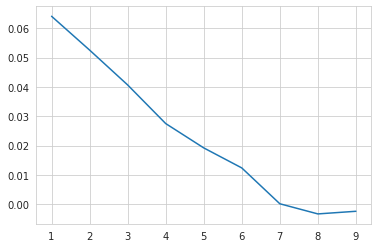

In [59]:
data_e1=[data_baseline[t].totalhrs.sum() for t in range(T0,TN)]
data_e2=[data_target[t].totalhrs.sum() for t in range(T0,TN)]
Delta=np.array(data_e2)/np.array(data_e1)-1
plt.plot(Delta)
print(pd.DataFrame(Delta,columns=['Delta_all']))

Grouped by $z$

        0      1      2      3      4      5      6      7      8      9
0.000 nan -0.207 -0.202 -0.214 -0.217 -0.231 -0.249 -0.270 -0.321 -0.311
1.000 nan -0.238 -0.223 -0.219 -0.257 -0.262 -0.294 -0.291 -0.301 -0.337
2.000 nan -0.323 -0.320 -0.300 -0.257 -0.312 -0.335 -0.334 -0.328 -0.377
3.000 nan -0.052 -0.100 -0.139 -0.176 -0.213 -0.243 -0.245 -0.263 -0.289
4.000 nan 0.013  -0.061 -0.126 -0.173 -0.206 -0.228 -0.253 -0.258 -0.262
5.000 nan 0.188  0.310  0.407  0.470  0.505  0.530  0.543  0.552  0.561 


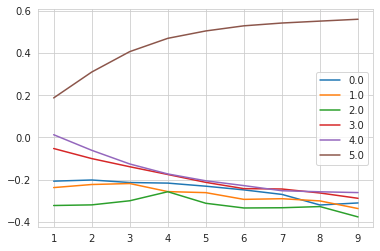

In [60]:

Delta=[]
fig, ax = plt.subplots()
for zval in np.sort(data_baseline[0].z.unique()):
    sel_baseline=[data_baseline[t].z==zval for t in range(T0,TN)]
    sel_target=[data_target[t].z==zval for t in range(T0,TN)]
    data_e1=[data_baseline[t][sel_baseline[t]].totalhrs.sum() for t in range(T0,TN)]
    data_e2=[data_target[t][sel_target[t]].totalhrs.sum() for t in range(T0,TN)]
    temp=np.array(data_e2)/np.array(data_e1)-1
    Delta.append(temp)
    ax.plot(temp)
    
ax.legend(np.sort(data_baseline[0].z.unique()))
Delta_by_z=pd.DataFrame(Delta,index=np.sort(data_baseline[0].z.unique()))    
print(Delta_by_z)

### Total hours by entreprenurs : $h_y+h_{\kappa}$

All business owners

   Delta_all
0 nan       
1 -0.076    
2 -0.146    
3 -0.200    
4 -0.238    
5 -0.265    
6 -0.287    
7 -0.303    
8 -0.309    
9 -0.317    


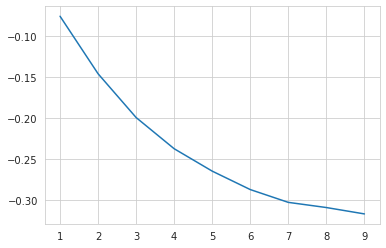

In [61]:
data_e1=[data_baseline[t].ent_hrs.sum() for t in range(T0,TN)]
data_e2=[data_target[t].ent_hrs.sum() for t in range(T0,TN)]
Delta=np.array(data_e2)/np.array(data_e1)-1
plt.plot(Delta)
print(pd.DataFrame(Delta,columns=['Delta_all']))

Grouped by $z$

        0      1      2      3      4      5      6      7      8      9
0.000 nan -0.208 -0.202 -0.214 -0.217 -0.232 -0.249 -0.271 -0.321 -0.311
1.000 nan -0.246 -0.229 -0.226 -0.264 -0.269 -0.299 -0.299 -0.309 -0.346
2.000 nan -0.346 -0.339 -0.314 -0.277 -0.336 -0.355 -0.354 -0.347 -0.400
3.000 nan -0.100 -0.145 -0.183 -0.220 -0.256 -0.285 -0.286 -0.306 -0.331
4.000 nan -0.090 -0.168 -0.227 -0.268 -0.296 -0.319 -0.337 -0.342 -0.348
5.000 nan 0.127  0.132  0.128  0.123  0.116  0.113  0.108  0.103  0.100 


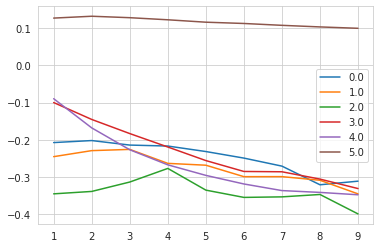

In [62]:
Delta=[]
fig, ax = plt.subplots()
for zval in np.sort(data_baseline[0].z.unique()):
    sel_baseline=[data_baseline[t].z==zval for t in range(T0,TN)]
    sel_target=[data_target[t].z==zval for t in range(T0,TN)]
    data_e1=[data_baseline[t][sel_baseline[t]].ent_hrs.sum() for t in range(T0,TN)]
    data_e2=[data_target[t][sel_target[t]].ent_hrs.sum() for t in range(T0,TN)]
    temp=np.array(data_e2)/np.array(data_e1)-1
    Delta.append(temp)
    ax.plot(temp)
    
ax.legend(np.sort(data_baseline[0].z.unique()))
Delta_by_z=pd.DataFrame(Delta,index=np.sort(data_baseline[0].z.unique()))    
print(Delta_by_z)

## Intensive Margin entreprenur hours: $h_y$+$h_{\kappa}$
In here we condition on individual who were running business in date $t=0$. We then compute the % change in hours "person-by-person" and report the 25, 50, 75 percentiles. Note that this not what GR do. But is closer to what Chettty does and calls as intensive margin. 

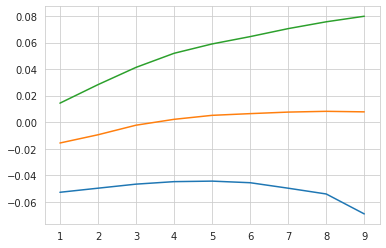

In [63]:
Delta_ent_hrs=[(data_target[t].ent_hrs-data_baseline[t].ent_hrs)/data_baseline[t].ent_hrs for t in range(T0,TN)]
sel=data_baseline[1].flagS
plt.plot([Delta_ent_hrs[t][data_baseline[1][sel].index].quantile([.25,.5,.75]) for t in range(T0,TN)])

### Num of entreprenurs 

   Delta_all
0 nan       
1 -0.128    
2 -0.160    
3 -0.190    
4 -0.208    
5 -0.228    
6 -0.244    
7 -0.253    
8 -0.262    
9 -0.273    


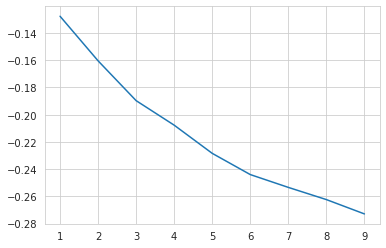

In [64]:
data_e1=[data_baseline[t].flagS.sum() for t in range(T0,TN)]
data_e2=[data_target[t].flagS.sum() for t in range(T0,TN)]
Delta=np.array(data_e2)/np.array(data_e1)-1
Delta[0]=np.nan
plt.plot(Delta)
print(pd.DataFrame(Delta,columns=['Delta_all']))

        0      1      2      3      4      5      6      7      8      9
0.000 nan -0.176 -0.180 -0.189 -0.187 -0.207 -0.216 -0.220 -0.232 -0.240
1.000 nan -0.181 -0.175 -0.172 -0.185 -0.197 -0.192 -0.198 -0.207 -0.224
2.000 nan -0.208 -0.194 -0.219 -0.203 -0.212 -0.225 -0.230 -0.233 -0.253
3.000 nan -0.093 -0.127 -0.149 -0.173 -0.200 -0.222 -0.224 -0.242 -0.260
4.000 nan -0.106 -0.168 -0.215 -0.246 -0.271 -0.291 -0.308 -0.314 -0.319
5.000 nan -0.002 -0.001 -0.001 0.004  0.001  -0.001 0.003  0.003  0.000 


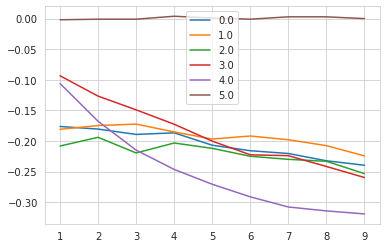

In [65]:
Delta=[]
fig, ax = plt.subplots()
for zval in np.sort(data_baseline[0].z.unique()):
    sel_baseline=[data_baseline[t].z==zval for t in range(T0,TN)]
    sel_target=[data_target[t].z==zval for t in range(T0,TN)]
    data_e1=[data_baseline[t][sel_baseline[t]].flagS.sum() for t in range(T0,TN)]
    data_e2=[data_target[t][sel_target[t]].flagS.sum() for t in range(T0,TN)]
    temp=np.array(data_e2)/np.array(data_e1)-1
    temp[0]=np.nan
    Delta.append(temp)
    ax.plot(temp)
    
ax.legend(np.sort(data_baseline[0].z.unique()))
Delta_by_z=pd.DataFrame(Delta,index=np.sort(data_baseline[0].z.unique()))    
print(Delta_by_z)

## Employee Hours: n

   Delta_all
0 nan       
1 0.137     
2 0.160     
3 0.174     
4 0.187     
5 0.200     
6 0.207     
7 0.212     
8 0.216     
9 0.221     


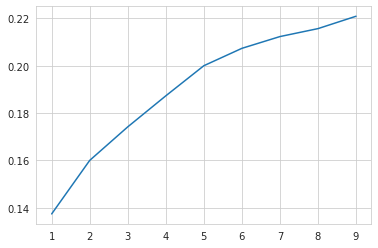

In [66]:
data_e1=[data_baseline[t].emp_hrs.sum() for t in range(T0,TN)]
data_e2=[data_target[t].emp_hrs.sum() for t in range(T0,TN)]
Delta=np.array(data_e2)/np.array(data_e1)-1
Delta[0]=np.nan
plt.plot(Delta)
print(pd.DataFrame(Delta,columns=['Delta_all']))

## Employee Hours: n intensive (median)

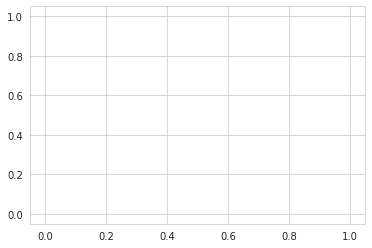

In [68]:
Delta_emp_hrs=[]
for t in range(T0,TN):
    Delta_emp_hrs.append((data_target[t].emp_hrs-data_baseline[t].emp_hrs)/data_baseline[t].emp_hrs)
sel=data_baseline[1].flagC
plt.plot([Delta_emp_hrs[t][data_baseline[1][sel].index].quantile(.5) for t in range(T0+1,TN)])